<a href="https://colab.research.google.com/github/samarth-mistry/data-analysis-pandas/blob/main/Merging_Joining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [6]:
week1=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Week%201%20Sales.csv")
week2=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Week%202%20Sales.csv")
customers=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Customers.csv")
foods=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Foods.csv")

In [10]:
#concat
week1.head(3)
week2.head(3)
pd.concat(objs=[week1,week2],ignore_index=True)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


In [13]:
#append
week1.append(other=week2,ignore_index=True)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


In [18]:
#multiindex
sales=pd.concat(objs=[week1,week2],keys=["W1","W2"])
sales.head(3)

Customer ID  Food ID
W1 0          537        9
   1           97        4
   2          658        1

In [24]:
sales.loc[("W1",)]
sales.loc[("W2",)]

sales.loc[("W1",240)]
sales.loc[("W2",183)]

sales.loc[("W1",240),'Customer ID']
sales.loc[("W2",183),['Customer ID','Food ID']]

Customer ID    858
Food ID          5
Name: (W2, 183), dtype: int64

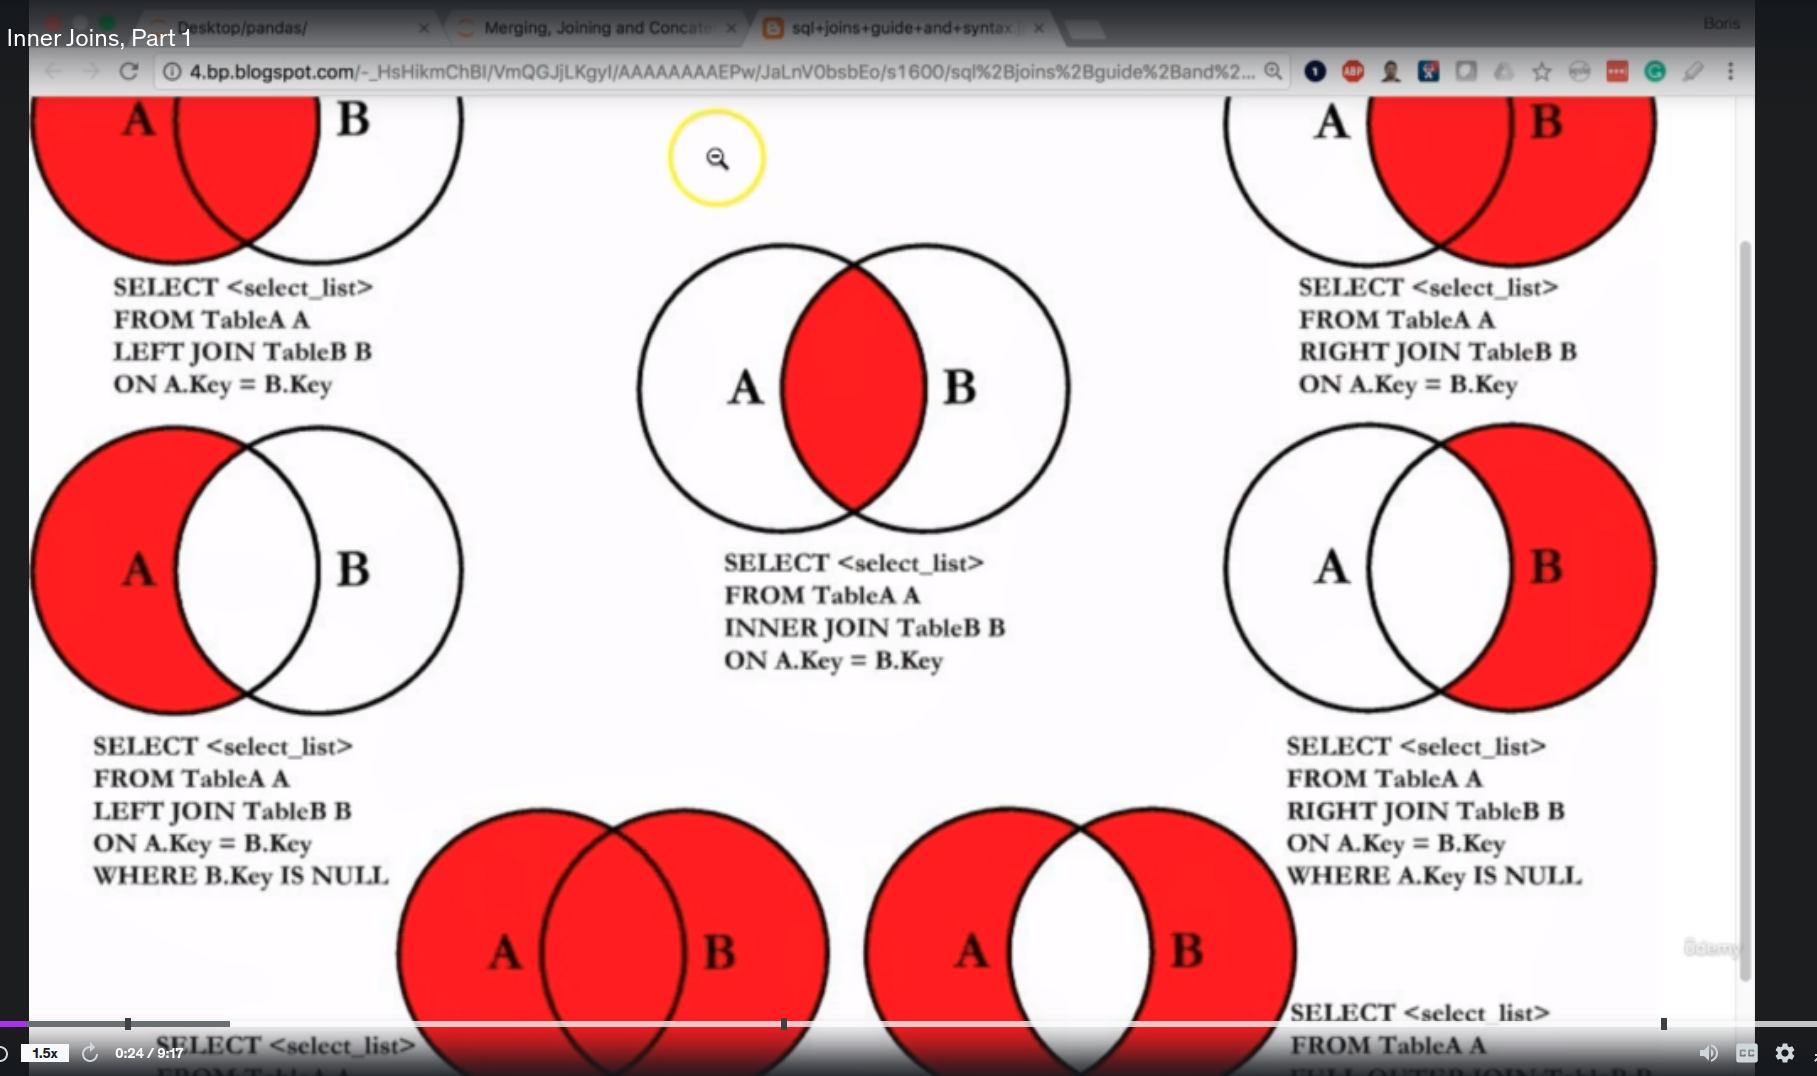

In [31]:
#innerJoins single column
week1.merge(week2,how="inner",on="Customer ID").head(4)#look at 155
week1.merge(week2,how="inner",on="Customer ID",suffixes=["-Week1","-Week2"]).head(4)#look at 155
week1.merge(week2,how="inner",on="Food ID",suffixes=["-Week1","-Week2"]).head(4)#look at 155

,Customer ID-Week1,Food ID,Customer ID-Week2
0,537,9,729
1,537,9,732
2,537,9,381
3,537,9,379


In [28]:
week1[week1["Customer ID"]==155]
week2[week2["Customer ID"]==155]

,Customer ID,Food ID
208,155,3


In [30]:
#innerJoins multiple column
week1.merge(week2,how="inner",on=["Customer ID","Food ID"]).head(4)

,Customer ID,Food ID
0,304,3
1,540,3
2,937,10
3,233,3


In [33]:
week1[week1["Customer ID"]==21]
week2[week2["Customer ID"]==21]

,Customer ID,Food ID
30,21,4


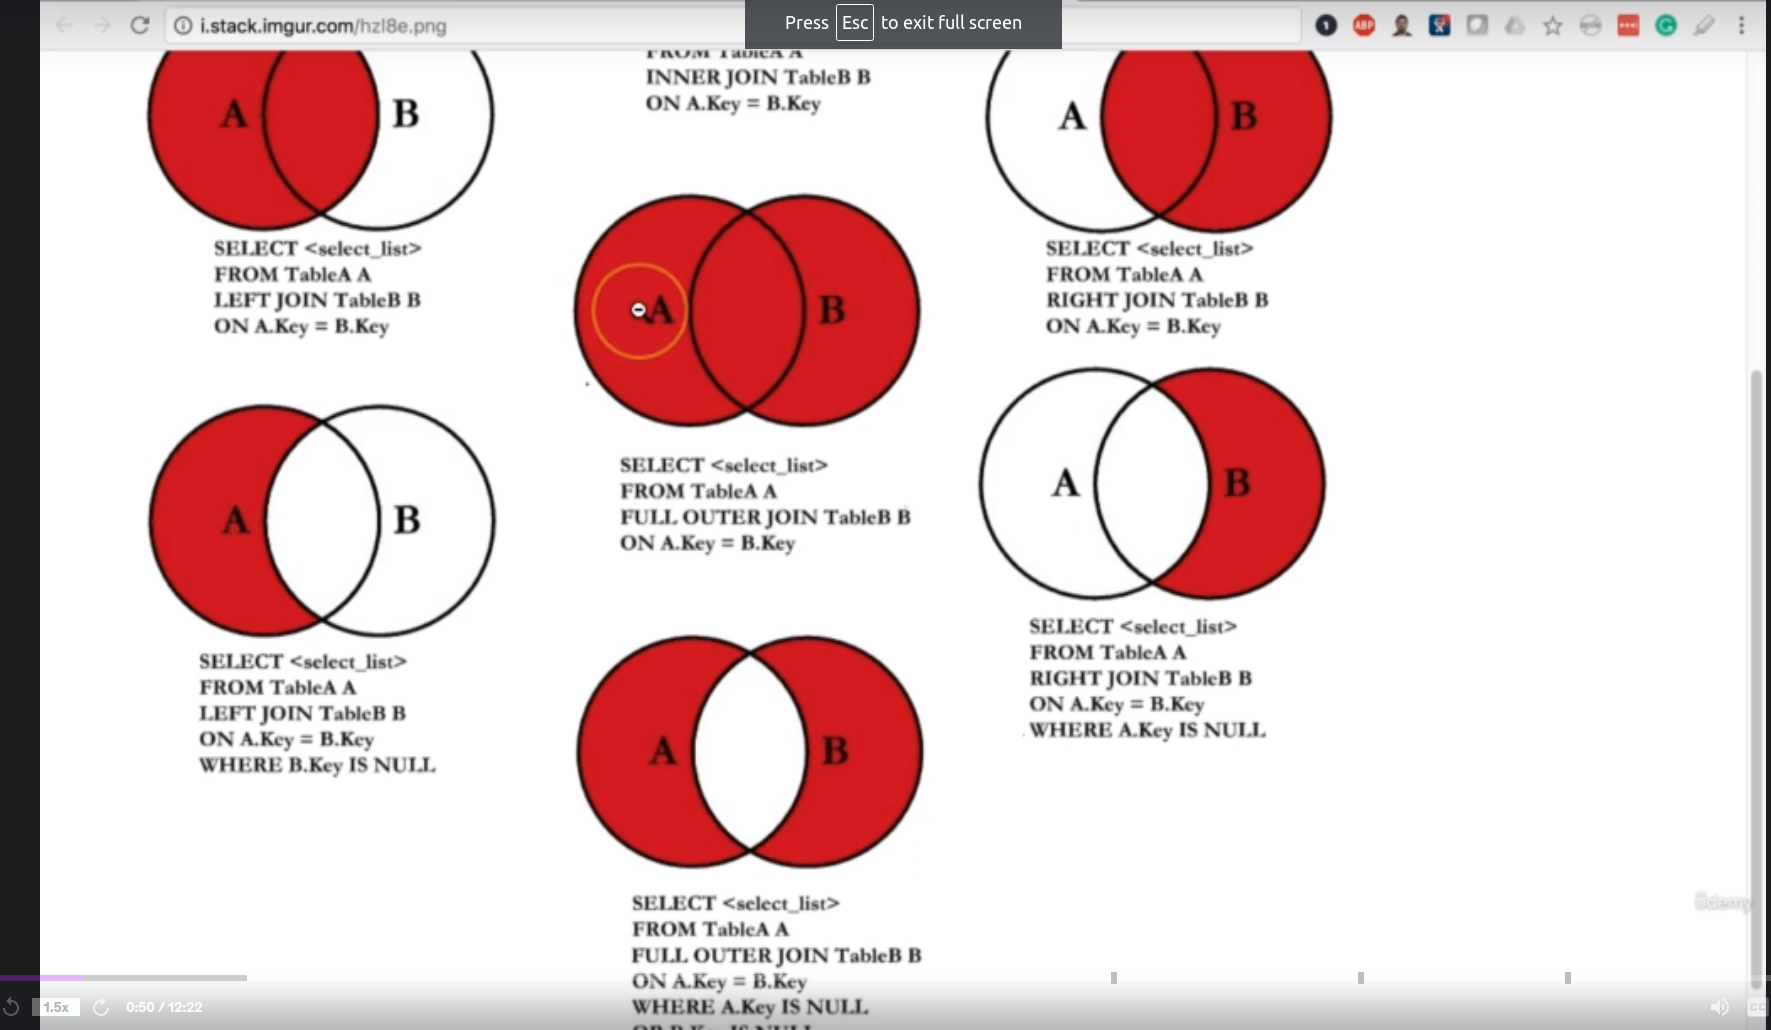

In [36]:
#outerJoins
week1.merge(week2,how="outer",on="Customer ID") #all the data of w1 and w2 will be included

,Customer ID,Food ID_x,Food ID_y
0,537,9.0,5.0
1,97,4.0,NaN
2,658,1.0,NaN
3,202,2.0,NaN
4,155,9.0,3.0
...,...,...,...
449,855,NaN,4.0
450,559,NaN,10.0
451,276,NaN,4.0
452,556,NaN,10.0


In [44]:
merged=week1.merge(week2,how="outer",on="Customer ID",indicator=True)
merged['_merge'].value_counts()
mask=merged['_merge'].isin(["left_only","right_only"]) #if came once then true
merged[mask]  #show only true-->only came once

,Customer ID,Food ID_x,Food ID_y,_merge
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
6,213,8.0,NaN,left_only
7,600,1.0,NaN,left_only
...,...,...,...,...
449,855,NaN,4.0,right_only
450,559,NaN,10.0,right_only
451,276,NaN,4.0,right_only
452,556,NaN,10.0,right_only


In [51]:
#leftJoin  -- >pullinf data from D2(Extension) w.r.t D1(Foundation)
week1.head(3)
foods.head(3)
week1.merge(foods,how='left',on="Food ID", sort=True) #sort by foodID
week1.merge(foods,how='left',on="Food ID", sort=True)

,Customer ID,Food ID,Food Item,Price
0,658,1,Sushi,3.99
1,600,1,Sushi,3.99
2,155,1,Sushi,3.99
3,341,1,Sushi,3.99
4,20,1,Sushi,3.99
...,...,...,...,...
245,809,10,Drink,1.75
246,584,10,Drink,1.75
247,274,10,Drink,1.75
248,151,10,Drink,1.75


Col name diff

In [53]:
#left_on right_on
week2.head()
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [58]:
week2.merge(customers,how="left",left_on="Customer ID", right_on="ID")
week2.merge(customers,how="left",left_on="Customer ID", right_on="ID",sort=True).drop("ID",axis=1)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,8,6,Frances,Adams,Female,Dabshots,Developer III
1,13,2,Ruth,Alvarez,Female,Twitterlist,Mechanical Systems Engineer
2,21,4,Albert,Burns,Male,Rhynoodle,Junior Executive
3,24,8,Donna,Thomas,Female,Jaxbean,Chief Design Engineer
4,27,4,Jessica,Bennett,Female,Twitternation,Account Executive
...,...,...,...,...,...,...,...
245,968,4,Teresa,Reynolds,Female,Flashdog,Budget/Accounting Analyst IV
246,969,3,Marie,Ortiz,Female,Meejo,Research Associate
247,977,7,Cynthia,Dixon,Female,Skalith,Automation Specialist II
248,994,2,Clarence,Morgan,Male,Edgewire,Geologist II


In [66]:
#INDEX MERGE
week1=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Week%201%20Sales.csv")
week2=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Week%202%20Sales.csv")
customers=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Customers.csv",index_col="ID")
foods=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Foods.csv",index_col="Food ID")

In [60]:
foods.head(2)

,Food Item,Price
Food ID,,
1,Sushi,3.99
2,Burrito,9.99


In [63]:
sales=week1.merge(customers,how="left",left_on='Customer ID',right_index=True)
sales.merge(foods,how='left',left_on='Food ID',right_index=True)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99
...,...,...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer,Donut,0.99
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant,Pasta,13.99
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor,Taco,2.99
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer,Pasta,13.99


In [65]:
week1.merge(week2,how='left',left_index=True,right_index=True,suffixes=['-W1','-W2'])

,Customer ID-W1,Food ID-W1,Customer ID-W2,Food ID-W2
0,537,9,688,10
1,97,4,813,7
2,658,1,495,10
3,202,2,189,5
4,155,9,267,3
...,...,...,...,...
245,413,9,783,10
246,926,6,556,10
247,134,3,547,9
248,396,6,252,9


In [67]:
#.join()
#INDEX MERGE
week1=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Week%201%20Sales.csv")
week2=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Week%202%20Sales.csv")
customers=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Customers.csv")
foods=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Foods.csv")
satisfaction=pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/pandas/Restaurant%20-%20Week%201%20Satisfaction.csv")

In [68]:
week1.merge(satisfaction, how="left",left_index=True,right_index=True)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [69]:
week1.join(satisfaction).head()

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10


In [70]:
#pd.merge()
pd.merge(week1,customers,how="left",left_on="Customer ID",right_on='ID')

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,537,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,97,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,658,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,202,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,155,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...,...
245,413,9,413,Diane,Bailey,Female,Wikibox,Technical Writer
246,926,6,926,Anne,Wagner,Female,Skyba,Legal Assistant
247,134,3,134,Diana,Hall,Female,Quinu,Financial Advisor
248,396,6,396,Juan,Romero,Male,Zoonder,Analyst Programmer
